In [13]:
# Imports and data generation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.90, random_state=42)
df = pd.DataFrame(X, columns=['x', 'y'])
df.head()

,x,y
0,-9.251753,6.558663
1,-9.612700,6.977423
2,-1.768907,7.915527
3,-7.075540,-5.891210
4,-10.672640,6.416245


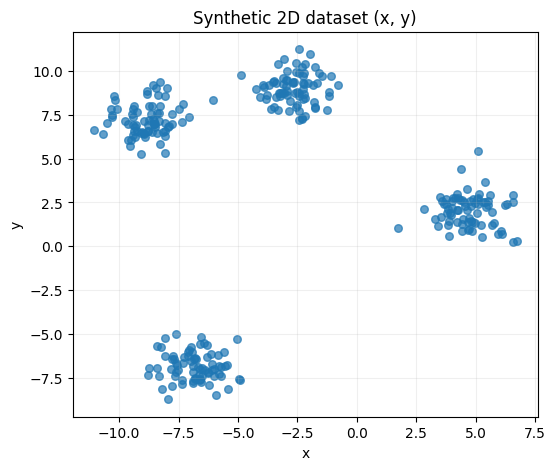

In [14]:
# scatter plot
plt.figure(figsize=(6,5))
plt.scatter(df['x'], df['y'], s=30, alpha=0.7)
plt.title('Synthetic 2D dataset (x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(alpha=0.2)
plt.show()

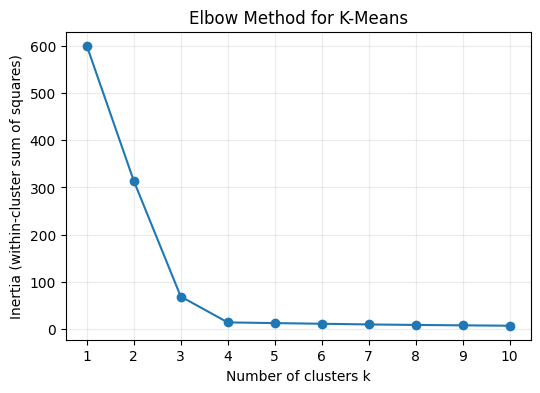

In [15]:
# Elbow method: compute inertia for k=1..10
ks = list(range(1, 11))
inertias = []
# Fit the scaler once and reuse it so we can inverse_transform later
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
for k in ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

# Plot inertia vs k
plt.figure(figsize=(6,4))
plt.plot(ks, inertias, '-o')
plt.xticks(ks)
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.title('Elbow Method for K-Means')
plt.grid(alpha=0.25)
plt.show()

In [16]:
# Automatic elbow detection (distance to line method)
# Create points (k, inertia) and compute perpendicular distance to line between first and last point
points = np.array(list(zip(ks, inertias)))
p1 = points[0]  # (k=1, inertia at k=1)
pN = points[-1] # (k=10, inertia at k=10)
line_vec = pN - p1
distances = []
for p in points:
    # cross product magnitude / line length gives perpendicular distance in 2D
    num = np.abs(np.cross(line_vec, p - p1))
    den = np.linalg.norm(line_vec)
    distances.append(num / den)

elbow_k = ks[int(np.argmax(distances))]
print(f'Elbow method suggests k = {elbow_k}')

Elbow method suggests k = 3


C:\Users\riya\AppData\Local\Temp\ipykernel_3428\3898776007.py:10: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  num = np.abs(np.cross(line_vec, p - p1))


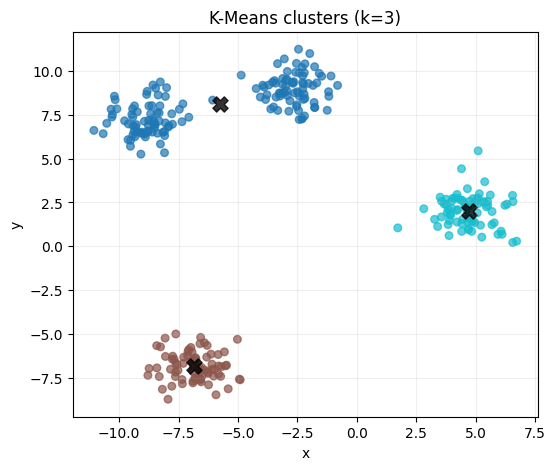

In [17]:
# Fit final KMeans using the detected k and plot clusters + centroids
k_final = elbow_k
km_final = KMeans(n_clusters=k_final, n_init=20, random_state=42)
labels = km_final.fit_predict(X_scaled)
centroids = km_final.cluster_centers_

# Convert centroids back to original scale for plotting using the fitted scaler
centroids_orig = scaler.inverse_transform(centroids)

plt.figure(figsize=(6,5))
scatter = plt.scatter(df['x'], df['y'], c=labels, cmap='tab10', s=30, alpha=0.7)
plt.scatter(centroids_orig[:,0], centroids_orig[:,1], c='black', s=120, alpha=0.8, marker='X')
plt.title(f'K-Means clusters (k={k_final})')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(alpha=0.2)
plt.show()